# 1. Business Understanding

A retailer needs a very high turnover and just-in-time delivery of products to be successful. For this, very precise forecasts are needed, which allow exact statements about which stores in which departments make how much turnover per week. The question is therefore as follows: What is the weekly sales forecast for all stores of a fictitious store if we take into account the data of the last three years, demographic information (CPI, Unemployment, Temperature, etc.)? Deriving from this, what then is the sales per week per department within one of these stores?

# 2. Data and Data understanding

The data used for the notebook is divided into three files. They contain different features and the common attribute stores. 

## 2.1. Import of Relevant Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 2.2. Read Train Data

In [2]:
walmart_features_data = pd.read_csv('https://storage.googleapis.com/ml-service-repository-datastorage/Sales_Forecast_for_retail_store_features.csv') 
walmart_train_data = pd.read_csv('https://storage.googleapis.com/ml-service-repository-datastorage/Sales_Forecast_for_retail_store_train.csv')
walmart_stores_data = pd.read_csv('https://storage.googleapis.com/ml-service-repository-datastorage/Sales_Forecast_for_retail_store_stores.csv')

In [3]:
walmart_train_data.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
walmart_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


describe data: We have a dataset with 421,570 entries. Each row contains the values "Store", "Dept", "Date", "Weekly_Sales" and "IsHoliday". Thus, this table already contains the value that is relevant for our consideration: "Weekly_Sales". We will create a forecast for this value and now look for features that affect this value. The format of these values are a boolean, a floating, two integer and an object.

In [5]:
walmart_train_data.describe(include='all')

,Store,Dept,Date,Weekly_Sales,IsHoliday
count,421570.000000,421570.000000,421570,421570.000000,421570
unique,NaN,NaN,143,NaN,2
top,NaN,NaN,2011-12-23,NaN,False
freq,NaN,NaN,3027,NaN,391909
mean,22.200546,44.260317,NaN,15981.258123,NaN
std,12.785297,30.492054,NaN,22711.183519,NaN
min,1.000000,1.000000,NaN,-4988.940000,NaN
25%,11.000000,18.000000,NaN,2079.650000,NaN
50%,22.000000,37.000000,NaN,7612.030000,NaN
75%,33.000000,74.000000,NaN,20205.852500,NaN


In [6]:
walmart_train_data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [7]:
walmart_train_data[walmart_train_data.duplicated(keep=False)] # existieren duplizierte Reihen ?

,Store,Dept,Date,Weekly_Sales,IsHoliday


In [8]:
walmart_train_data.isnull().sum() # existieren Nullwerte ? Die Summe aller vorhandenen Nullwerte --> keine vorhanden

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

## 2.2.1. Descriptive Analysis

C:\Users\eebal\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

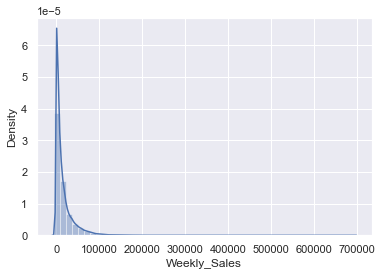

In [9]:
sns.distplot(walmart_train_data['Weekly_Sales'])  # wie sieht die Verteilung unserer dependent variable aus ?

<AxesSubplot:>

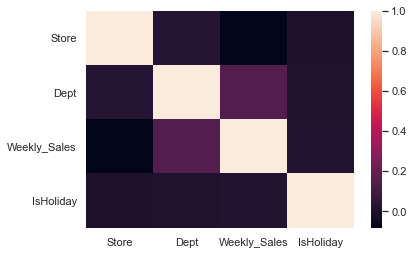

In [10]:
sns.heatmap(walmart_train_data.corr()) 

## 2.3. Read Feature Data

In [11]:
walmart_features_data.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [12]:
walmart_features_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


describe data: We have a dataset with 8,190 entries. Each row contains the value "Store", "Date", "Temperature", "Fuel_Price", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5", "CPI", "Unemployment" and "IsHoliday". The format of these values are one boolean, 9 float, one integer and 1 object.

In [13]:
walmart_features_data.describe(include='all')

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
count,8190.000000,8190,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000,8190
unique,NaN,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,2011-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7605
mean,23.000000,NaN,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821,NaN
std,12.987966,NaN,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259,NaN
min,1.000000,NaN,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,NaN
25%,12.000000,NaN,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000,NaN
50%,23.000000,NaN,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000,NaN
75%,34.000000,NaN,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000,NaN


describe data: We do not have corresponding figures for all values. Values are missing for MarkDown1-MarkDown5, CPI and Unemployment. It is interesting that there are negative values in "MarkDown". According to the description of the data, the MarkDown values are not available for all stores and only since a certain date. This explains the discrepancy in quantity. 

In [14]:
walmart_features_data.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [15]:
walmart_features_data.isnull().sum() 

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [16]:
null = pd.DataFrame(walmart_features_data.dtypes).T.rename(index={0:'column Type'}) 
null = null.append(pd.DataFrame(walmart_features_data.isnull().sum()).T.rename(index={0:'null values (nb)'}))
null = null.append(pd.DataFrame(walmart_features_data.isnull().sum()/walmart_features_data.shape[0]*100).T.
                                       rename(index={0: 'null values (%)'}))
null

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
column Type,int64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool
null values (nb),0,0,0,0,4158,5269,4577,4726,4140,585,585,0
null values (%),0,0,0,0,50.7692,64.3346,55.8852,57.7045,50.5495,7.14286,7.14286,0


In [17]:
from statistics import mean
walmart_features_data['CPI'] = walmart_features_data['CPI'].fillna(mean(walmart_features_data['CPI']))
walmart_features_data['Unemployment'] = walmart_features_data['Unemployment'].fillna(mean(walmart_features_data['Unemployment']))
walmart_features_data['MarkDown1'] = walmart_features_data['MarkDown1'].fillna(0)
walmart_features_data['MarkDown2'] = walmart_features_data['MarkDown2'].fillna(0)
walmart_features_data['MarkDown3'] = walmart_features_data['MarkDown3'].fillna(0)
walmart_features_data['MarkDown4'] = walmart_features_data['MarkDown4'].fillna(0)
walmart_features_data['MarkDown5'] = walmart_features_data['MarkDown5'].fillna(0)

## 2.3.2. Descriptive Analysis

<AxesSubplot:>

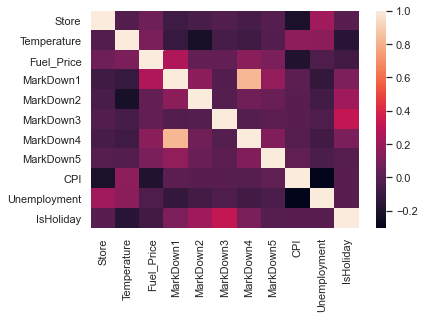

In [18]:
sns.heatmap(walmart_features_data.corr())  

## 2.4. Read Stores Data

In [19]:
walmart_stores_data.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [20]:
walmart_stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


describe data: We have a data set with 45 entries. Each row contains the values "Store", "Type" and "Size". The format of these values are two integer and one object. 

In [21]:
walmart_stores_data.describe(include='all')

,Store,Type,Size
count,45.000000,45,45.000000
unique,NaN,3,NaN
top,NaN,A,NaN
freq,NaN,22,NaN
mean,23.000000,NaN,130287.600000
std,13.133926,NaN,63825.271991
min,1.000000,NaN,34875.000000
25%,12.000000,NaN,70713.000000
50%,23.000000,NaN,126512.000000
75%,34.000000,NaN,202307.000000


describe data: Since we already know that there are 45 stores, this is a dataset that provides details about each store. There are 45 stores, there are 3 types (A,B and C) and the size of the stores varies from 34,875 to 219,622 in probably square feet.

## 2.4.1. Descriptive Analysis

In [22]:
#sns.pairplot(walmart_stores_data, vars=['Store', 'Size'], hue='Type')  

<AxesSubplot:xlabel='Type', ylabel='Size'>

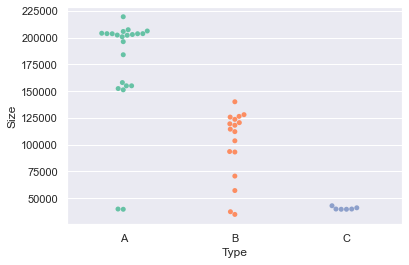

In [23]:
sns.swarmplot(x='Type',y='Size',data=walmart_stores_data,palette='Set2')

It looks like the "Type" can be determined based on size. However, you can also see that there are at least 4 stores that were probably assigned incorrectly, since there are some in the size range between 25,000 and 50,000 in type B and A that probably should have been assigned more to type C.

In [24]:
walmart_stores_data.loc[walmart_stores_data.Size < 50000, "Type"] = "C"
walmart_stores_data.loc[walmart_stores_data.Size >= 50000, "Type"] = "B"
walmart_stores_data.loc[walmart_stores_data.Size >= 150000, "Type"] = "A"

<AxesSubplot:xlabel='Type', ylabel='Size'>

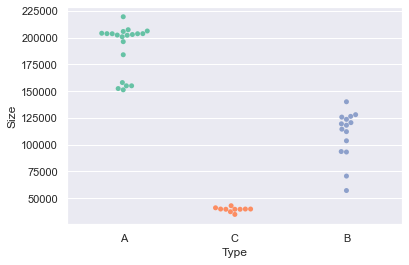

In [25]:
sns.swarmplot(x='Type',y='Size',data=walmart_stores_data,palette='Set2')

<AxesSubplot:xlabel='Type', ylabel='Store'>

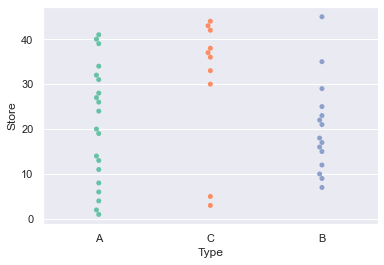

In [26]:
sns.swarmplot(x='Type',y='Store',data=walmart_stores_data,palette='Set2') # welche Ladennummer zu welchem Typ gehört

<AxesSubplot:xlabel='Type', ylabel='count'>

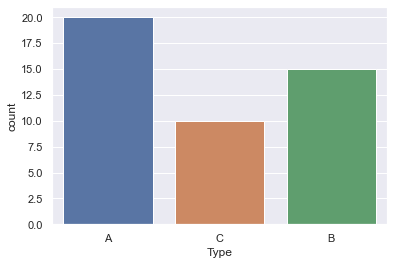

In [27]:
sns.countplot(x='Type',data=walmart_stores_data)   # Betrachtung, wieviele Läden wir von welchem Type haben

In [28]:
sizes=walmart_stores_data.count()['Size'].round(1)
print(sizes)

45


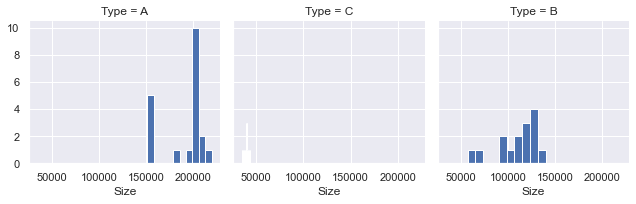

In [29]:
g = sns.FacetGrid(data=walmart_stores_data,col='Type')   # Betrachtung, wie sich inerhalb eines Types dann noch die Größe verteilt
g.map(plt.hist,'Size')

In [30]:
walmart_stores_data.columns

Index(['Store', 'Type', 'Size'], dtype='object')

In [31]:
walmart_stores_data.isnull().sum() # existieren Nullwerte ?

Store    0
Type     0
Size     0
dtype: int64

# 3. Data Preparation

We combine all 3 available data sets (tables), since all 3 share a common key ("Store") over which a summary is possible. The further consideration becomes only possible if we consider the data from all 3 data sets together, which dependencies exist here. 

The goal is to make a forecast on the data of "Weekly_Sales", therefore we are looking for all those data that have an influence on this.

## 3.1. Combine data

In [32]:
festo_data = walmart_features_data.merge(walmart_stores_data, how='inner', on='Store')
comb_data = walmart_train_data.merge(festo_data, how='inner', on=['Store','Date','IsHoliday']).sort_values(by=['Store',
                                                                            'Dept', 'Date']).reset_index(drop=True)

In [33]:
comb_data.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315


In [34]:
comb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     421570 non-null  float64
 8   MarkDown2     421570 non-null  float64
 9   MarkDown3     421570 non-null  float64
 10  MarkDown4     421570 non-null  float64
 11  MarkDown5     421570 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [35]:
#sns.pairplot(comb_data, vars=['Weekly_Sales', 'Dept', 'Store', 'Size', 'CPI', 'Unemployment', 'Fuel_Price', 'Temperature'], hue='Type')

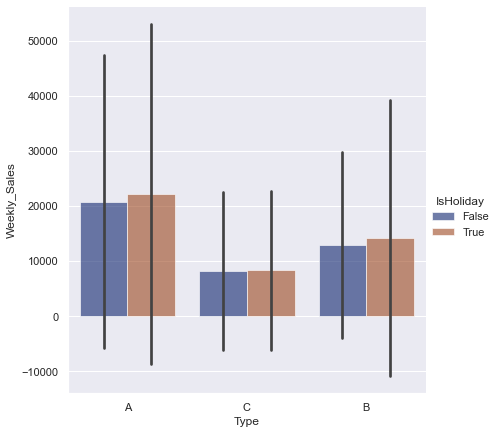

In [37]:
sns.catplot(data=comb_data, kind="bar",
    x="Type", y="Weekly_Sales", hue="IsHoliday",
    ci="sd", palette="dark", alpha=.6, height=6)

## 3.2. Clean combined Data

We convert the field "IsHoliday" from boolean to an int with 0 and 1 

In [38]:
comb_data = comb_data.applymap(lambda x: 1 if x == True else x)
comb_data = comb_data.applymap(lambda x: 0 if x == False else x)

We convert the field "Date" from an object to a date field

In [39]:
#comb_data["Date"] = pd.to_datetime(comb_data["Date"])
comb_data.Date = pd.to_datetime(comb_data.Date)

In [40]:
# delete negative values for the feature Weekly_Sales and create a new DataFrame
clean_data = comb_data[comb_data['Weekly_Sales']>0]

In [41]:
# add a field for "week" and "year" to allow further viewing on calendar week
#clean_data['Week'] = clean_data1['Date'].isocalendar()[1]
clean_data['Week'] = clean_data.Date.dt.week
clean_data['Year'] = clean_data.Date.dt.year

<ipython-input-41-df9ed1724864>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  clean_data['Week'] = clean_data.Date.dt.week
<ipython-input-41-df9ed1724864>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Week'] = clean_data.Date.dt.week
<ipython-input-41-df9ed1724864>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Year'] = clean_data.Date.dt.year


In [42]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420212 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420212 non-null  int64         
 1   Dept          420212 non-null  int64         
 2   Date          420212 non-null  datetime64[ns]
 3   Weekly_Sales  420212 non-null  float64       
 4   IsHoliday     420212 non-null  int64         
 5   Temperature   420212 non-null  float64       
 6   Fuel_Price    420212 non-null  float64       
 7   MarkDown1     420212 non-null  float64       
 8   MarkDown2     420212 non-null  float64       
 9   MarkDown3     420212 non-null  float64       
 10  MarkDown4     420212 non-null  float64       
 11  MarkDown5     420212 non-null  float64       
 12  CPI           420212 non-null  float64       
 13  Unemployment  420212 non-null  float64       
 14  Type          420212 non-null  object        
 15  Size          420

In [43]:
# save date local
clean_data.to_csv('clean_data.csv', index = False)

In [44]:
# We convert the field "Type", since it is a categorical value using One-Hot Encoding 
clean_data1 = pd.get_dummies(clean_data, columns=["Type"]) 

In [45]:
clean_data1.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420212 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420212 non-null  int64         
 1   Dept          420212 non-null  int64         
 2   Date          420212 non-null  datetime64[ns]
 3   Weekly_Sales  420212 non-null  float64       
 4   IsHoliday     420212 non-null  int64         
 5   Temperature   420212 non-null  float64       
 6   Fuel_Price    420212 non-null  float64       
 7   MarkDown1     420212 non-null  float64       
 8   MarkDown2     420212 non-null  float64       
 9   MarkDown3     420212 non-null  float64       
 10  MarkDown4     420212 non-null  float64       
 11  MarkDown5     420212 non-null  float64       
 12  CPI           420212 non-null  float64       
 13  Unemployment  420212 non-null  float64       
 14  Size          420212 non-null  int64         
 15  Week          420

In [46]:
clean_data1.describe(include='all')

<ipython-input-46-fbf7f56c5ae5>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  clean_data1.describe(include='all')


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week,Year,Type_A,Type_B,Type_C
count,420212.000000,420212.000000,420212,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
unique,NaN,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2011-12-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,3018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2010-02-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2012-10-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,22.195611,44.241309,NaN,16033.114591,0.070345,60.090599,3.360890,2590.323565,878.905242,468.845949,1083.534361,1662.805002,171.212496,7.960000,136749.732787,25.828408,2010.968454,0.481390,0.344548,0.174062
std,12.787236,30.508819,NaN,22729.492116,0.255729,18.447857,0.458519,6053.415601,5076.928566,5534.069859,3896.068938,4206.209357,39.162445,1.863879,60993.084568,14.152489,0.796898,0.499654,0.475221,0.379163
min,1.000000,1.000000,NaN,0.010000,0.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000,1.000000,2010.000000,0.000000,0.000000,0.000000
25%,11.000000,18.000000,NaN,2120.130000,0.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000,14.000000,2010.000000,0.000000,0.000000,0.000000


## 3.3. Descriptive Analysis new Data

C:\Users\eebal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\eebal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\eebal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


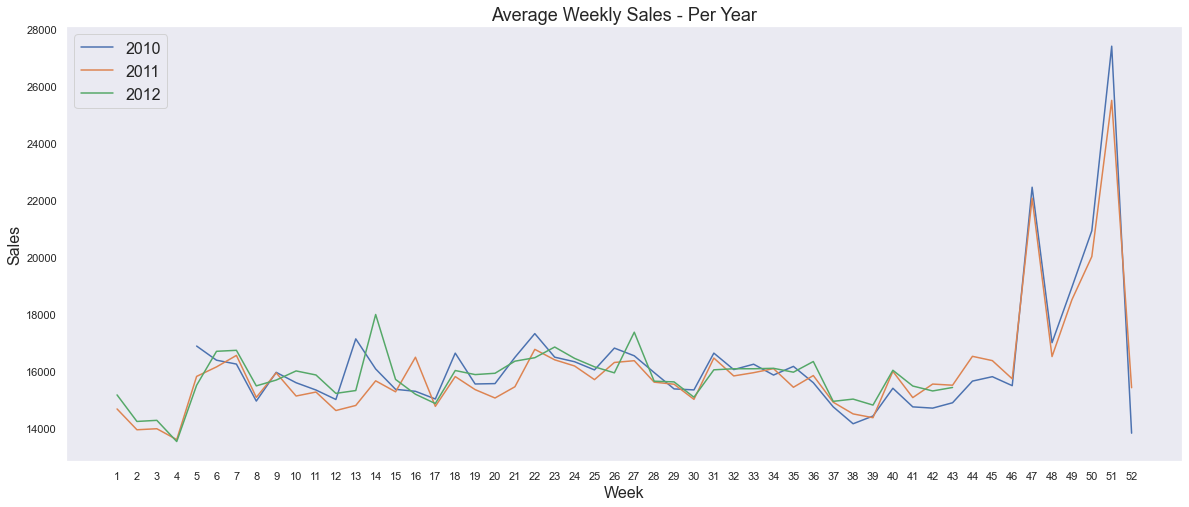

In [47]:
weekly_sales_2010 = clean_data1[clean_data1.Year==2010]['Weekly_Sales'].groupby(clean_data1['Week']).mean()
weekly_sales_2011 = clean_data1[clean_data1.Year==2011]['Weekly_Sales'].groupby(clean_data1['Week']).mean()
weekly_sales_2012 = clean_data1[clean_data1.Year==2012]['Weekly_Sales'].groupby(clean_data1['Week']).mean()
plt.figure(figsize=(20,8))
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

We see that sales behave similarly in the 3 years. There are peaks before week 7 (Super Bowl), before week 48 (ThanksGiving) and before week 52 (Christmas), which is presumably generated by black Friday and the Christmas business. Sales drop before week 37 (Labor Day).

In [48]:
clean_data1[['Dept', 'Weekly_Sales']].groupby(['Dept'], as_index=False).mean().sort_values(by='Weekly_Sales', ascending=False)

,Dept,Weekly_Sales
73,92,75204.870531
76,95,69824.423080
36,38,61090.619568
60,72,50852.993977
57,65,45441.706224
...,...,...
43,45,23.807907
49,51,22.718938
37,39,11.123750
63,78,10.765156


C:\Users\eebal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


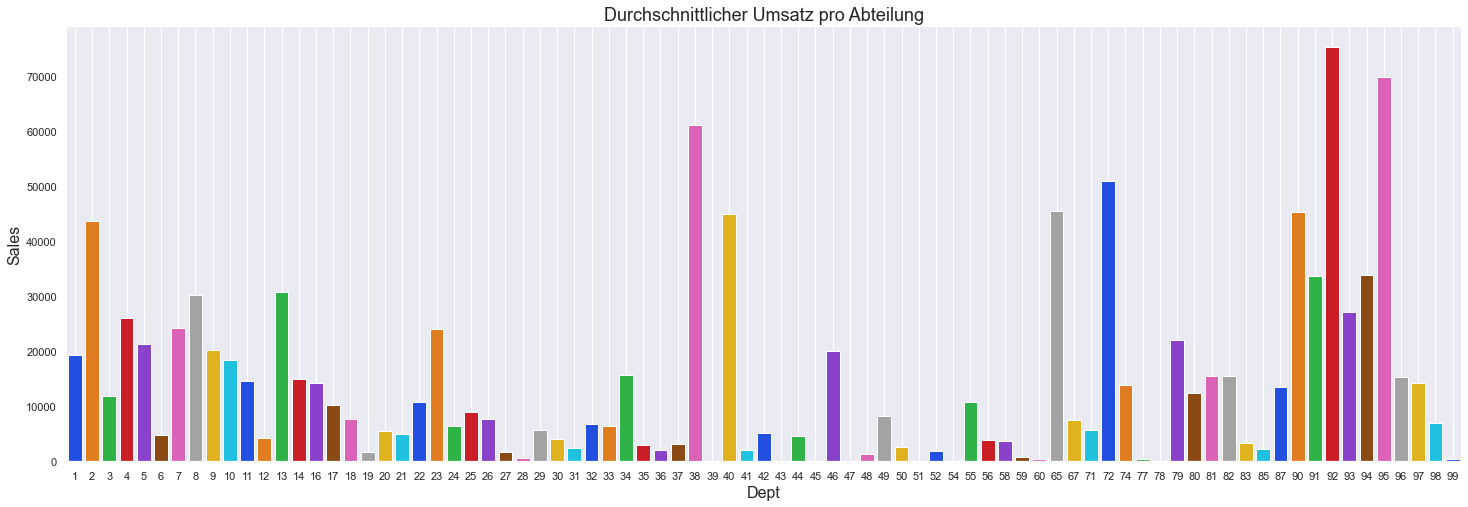

In [49]:
weekly_sales = clean_data1['Weekly_Sales'].groupby(clean_data1['Dept']).mean()
plt.figure(figsize=(25,8))
sns.barplot(weekly_sales.index, weekly_sales.values, palette='bright')
plt.grid()
plt.title('Durchschnittlicher Umsatz pro Abteilung', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Dept', fontsize=16)
plt.show()

division 92 brings in the most sales in total and on average 

In [50]:
clean_data1[['Store', 'Weekly_Sales']].groupby(['Store'], as_index=False).mean().sort_values(by='Weekly_Sales', ascending=False)

,Store,Weekly_Sales
19,20,29627.580994
3,4,29175.540012
13,14,28885.743572
12,13,27399.631860
1,2,26961.734433
9,10,26474.084736
26,27,24897.723614
5,6,21960.799719
0,1,21749.145978
38,39,21084.103489


C:\Users\eebal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


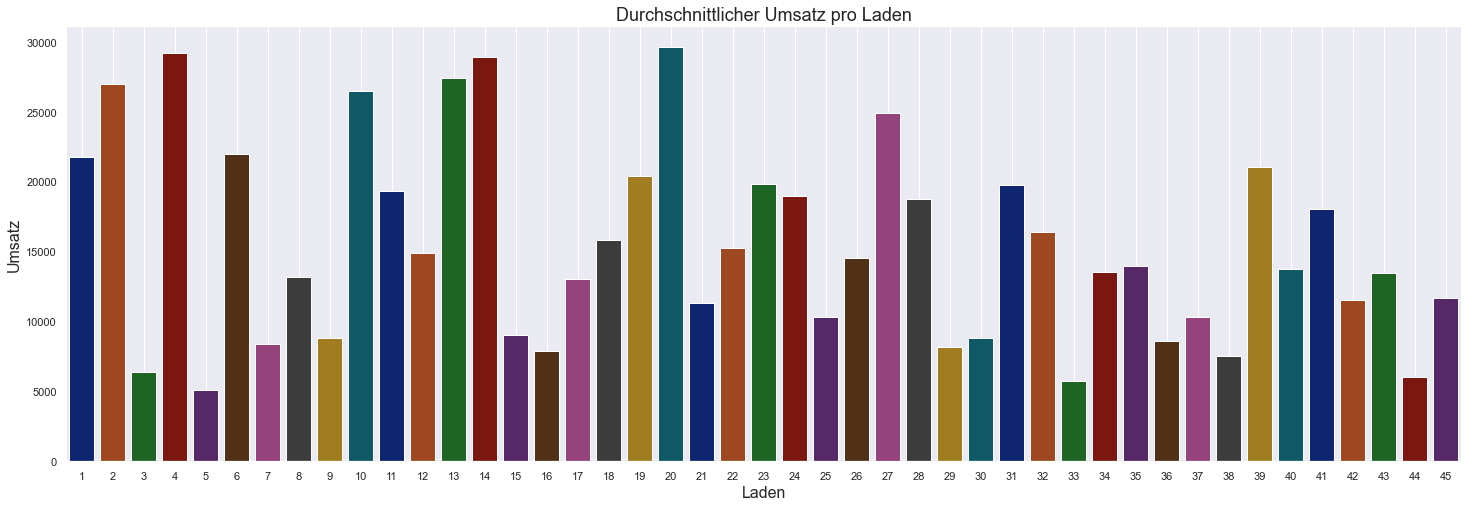

In [51]:
weekly_sales = clean_data1['Weekly_Sales'].groupby(clean_data1['Store']).mean()
plt.figure(figsize=(25,8))
sns.barplot(weekly_sales.index, weekly_sales.values, palette='dark')
plt.grid()
plt.title('Durchschnittlicher Umsatz pro Laden', fontsize=18)
plt.ylabel('Umsatz', fontsize=16)
plt.xlabel('Laden', fontsize=16)
plt.show()

C:\Users\eebal\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

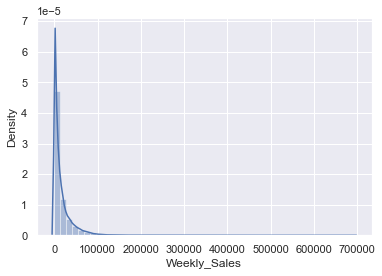

In [52]:
sns.distplot(clean_data1['Weekly_Sales'])   

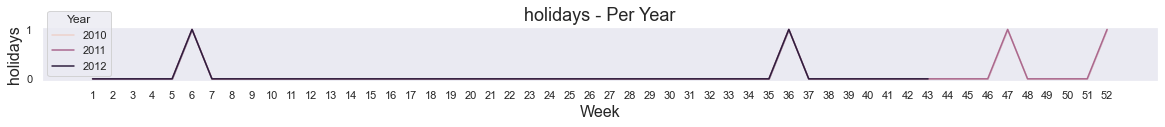

In [53]:
plt.figure(figsize=(20,1))
sns.lineplot(x="Week", y="IsHoliday", hue="Year", data=clean_data1)
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.title('holidays - Per Year', fontsize=18)
plt.ylabel('holidays', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

The holidays are always in the same week every year. Looking at the calendar week of the holiday and the curve of Weekly Sales: Thanksgiving and Christmas has an impact on sales, but the remaining two are not significant. However, we leave IsHoliday in the table because of this.

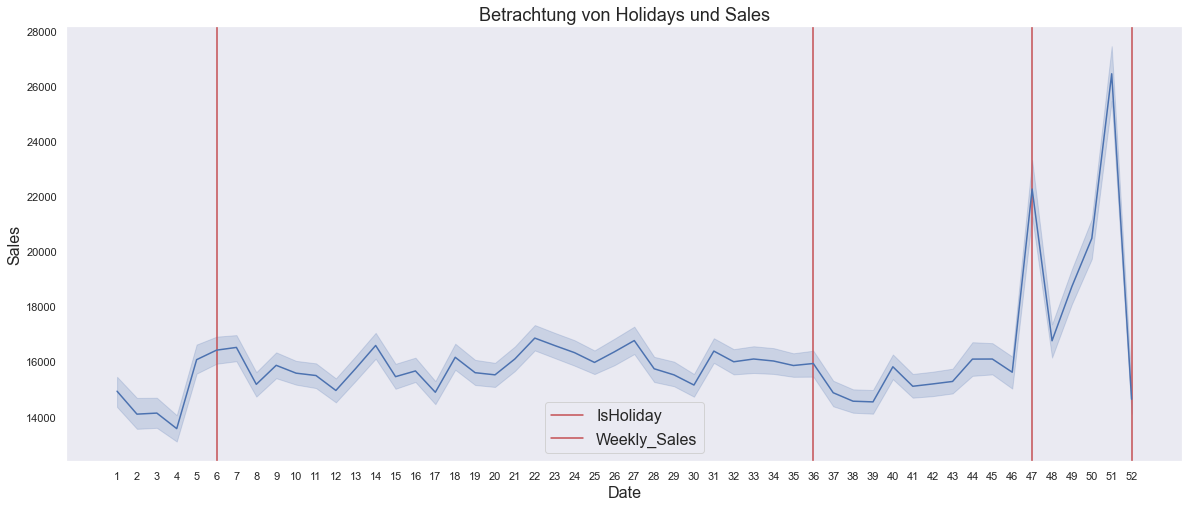

In [54]:
plt.figure(figsize=(20,8))

plt.axvline(6, 0,25000, color="r")
plt.axvline(36, 0,25000, color="r")
plt.axvline(47, 0,25000, color="r")
plt.axvline(52, 0,25000, color="r")

sns.lineplot(x="Week", y="Weekly_Sales", data=clean_data1)
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['IsHoliday', 'Weekly_Sales'], loc='best', fontsize=16)
plt.title('Betrachtung von Holidays und Sales', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

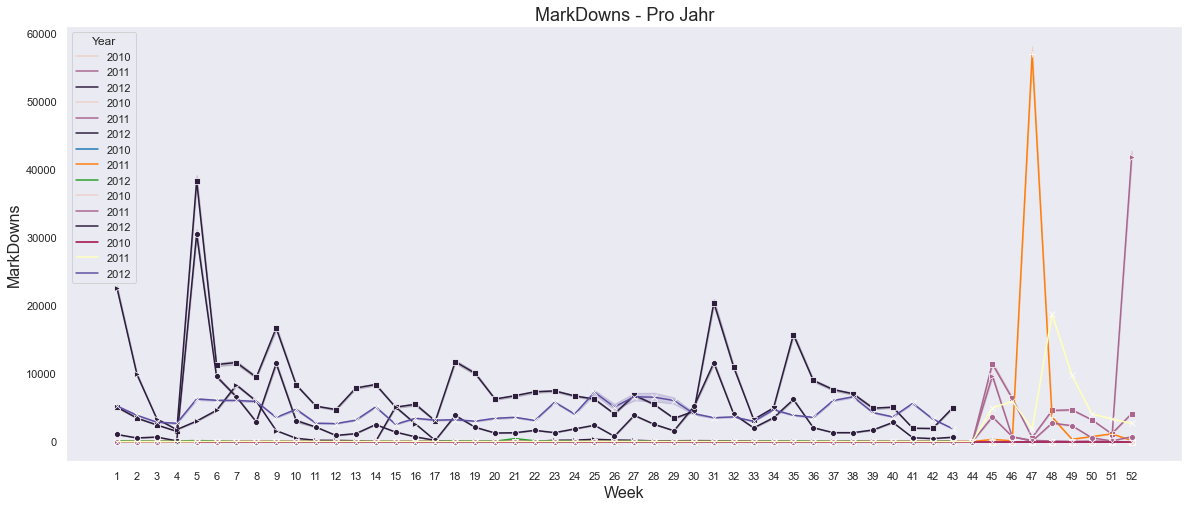

In [55]:
plt.figure(figsize=(20,8))
sns.lineplot(x="Week", y="MarkDown1", hue="Year", data=clean_data1, marker="s") 
sns.lineplot(x="Week", y="MarkDown2", hue="Year", data=clean_data1, marker=">") #, palette="tab10")
sns.lineplot(x="Week", y="MarkDown3", hue="Year", data=clean_data1, marker="+", palette="tab10")
sns.lineplot(x="Week", y="MarkDown4", hue="Year", data=clean_data1, marker="o")
sns.lineplot(x="Week", y="MarkDown5", hue="Year", data=clean_data1, marker="x", palette="Spectral")
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.title('MarkDowns - Pro Jahr', fontsize=18)
plt.ylabel('MarkDowns', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

MarkDown1: many individual actions, major action just before week 7 with Super Bowl; 
MarkDown2: Action in week 52 before Christmas, smaller atkion before week 7 with Super Bowl;
MarkDown3: only action in week 47 before ThanksGiving;
MarkDown4: many individual actions, larger one in week 5 before Super Bowl;
MarkDown5: many individual promotions, larger in week 48 on ThanksGiving possibly also Black Friday

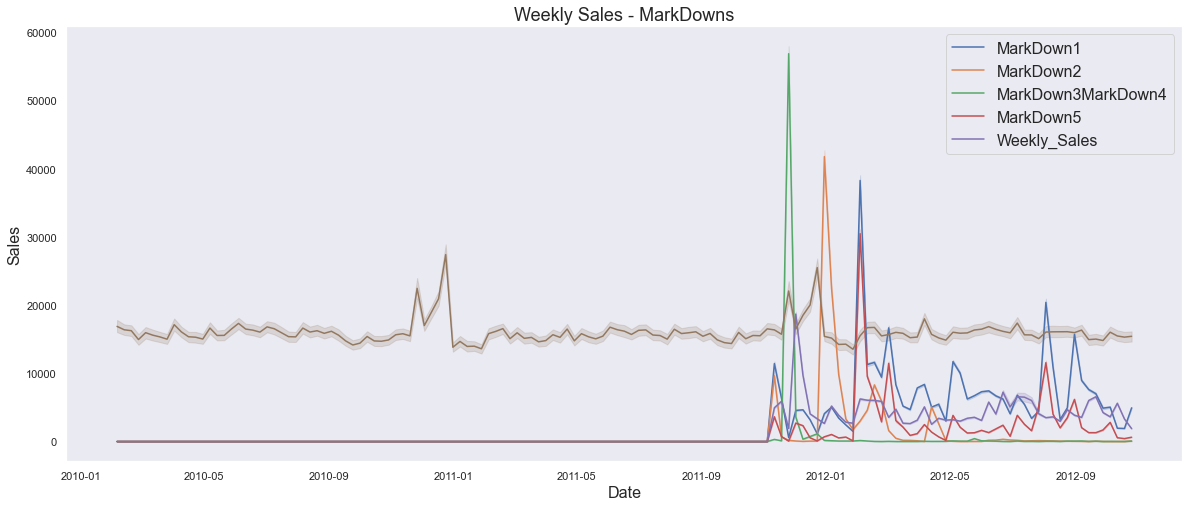

In [56]:
plt.figure(figsize=(20,8))
sns.lineplot(x="Date", y="MarkDown1", data=clean_data1)
sns.lineplot(x="Date", y="MarkDown2", data=clean_data1)
sns.lineplot(x="Date", y="MarkDown3", data=clean_data1)
sns.lineplot(x="Date", y="MarkDown4", data=clean_data1)
sns.lineplot(x="Date", y="MarkDown5", data=clean_data1)

sns.lineplot(x="Date", y="Weekly_Sales", data=clean_data1)
plt.grid()
plt.legend(['MarkDown1', 'MarkDown2', 'MarkDown3' 'MarkDown4', 'MarkDown5', 'Weekly_Sales'], loc='best', fontsize=16)
plt.title('Weekly Sales - MarkDowns', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

In [57]:
# We include the holidays in our table to see where the holidays are located.
holidays = {'Super Bowl': pd.to_datetime(['12-Feb-10', '11-Feb-11', '10-Feb-12', '8-Feb-13']), 'Labor Day': pd.to_datetime(['10-Sep-10', '9-Sep-11', '7-Sep-12', '6-Sep-13']), 'Thanksgiving': pd.to_datetime(['26-Nov-10', '25-Nov-11', '23-Nov-12', '29-Nov-13']), 'Christmas': pd.to_datetime(['31-Dec-10', '30-Dec-11', '28-Dec-12', '27-Dec-13']) }
# Add column indicating which holiday follows
clean_data1.insert(clean_data1.columns.tolist().index('IsHoliday')+1, 'Holiday', np.nan)
for holiday in holidays: 
    clean_data1.loc[clean_data1['Date'].isin(holidays[holiday]), 'Holiday'] = holiday

In [58]:
clean_data1.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420212 entries, 0 to 421569
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420212 non-null  int64         
 1   Dept          420212 non-null  int64         
 2   Date          420212 non-null  datetime64[ns]
 3   Weekly_Sales  420212 non-null  float64       
 4   IsHoliday     420212 non-null  int64         
 5   Holiday       29560 non-null   object        
 6   Temperature   420212 non-null  float64       
 7   Fuel_Price    420212 non-null  float64       
 8   MarkDown1     420212 non-null  float64       
 9   MarkDown2     420212 non-null  float64       
 10  MarkDown3     420212 non-null  float64       
 11  MarkDown4     420212 non-null  float64       
 12  MarkDown5     420212 non-null  float64       
 13  CPI           420212 non-null  float64       
 14  Unemployment  420212 non-null  float64       
 15  Size          420

In [59]:
clean_data1.head(5)   

,Store,Dept,Date,Weekly_Sales,IsHoliday,Holiday,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week,Year,Type_A,Type_B,Type_C
0,1,1,2010-02-05,24924.50,0,NaN,42.31,2.572,0.0,0.0,...,0.0,0.0,211.096358,8.106,151315,5,2010,1,0,0
1,1,1,2010-02-12,46039.49,1,Super Bowl,38.51,2.548,0.0,0.0,...,0.0,0.0,211.242170,8.106,151315,6,2010,1,0,0
2,1,1,2010-02-19,41595.55,0,NaN,39.93,2.514,0.0,0.0,...,0.0,0.0,211.289143,8.106,151315,7,2010,1,0,0
3,1,1,2010-02-26,19403.54,0,NaN,46.63,2.561,0.0,0.0,...,0.0,0.0,211.319643,8.106,151315,8,2010,1,0,0
4,1,1,2010-03-05,21827.90,0,NaN,46.50,2.625,0.0,0.0,...,0.0,0.0,211.350143,8.106,151315,9,2010,1,0,0


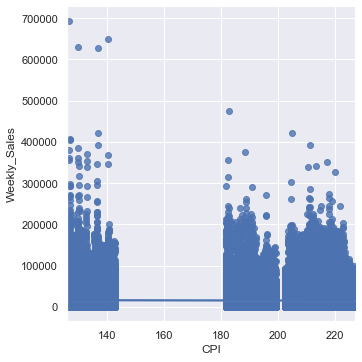

In [60]:
sns.lmplot(x='CPI',y='Weekly_Sales',data=clean_data1)

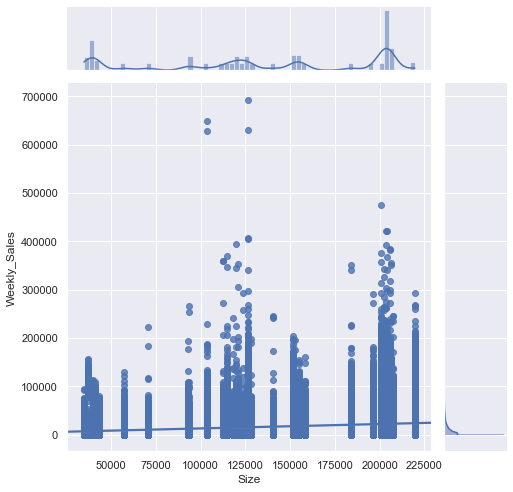

In [73]:
sns.jointplot(x="Size", y="Weekly_Sales", data=clean_data1, kind="reg", truncate=False, height=7)

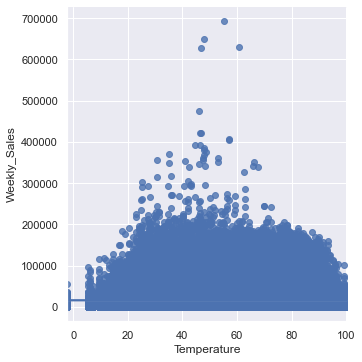

In [74]:
sns.lmplot(x='Temperature',y='Weekly_Sales',data=clean_data1)

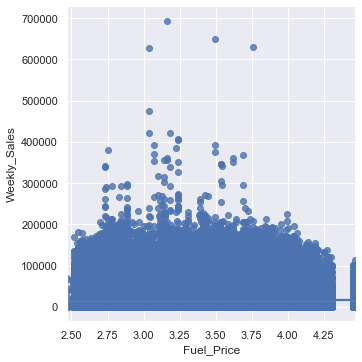

In [75]:
sns.lmplot(x='Fuel_Price',y='Weekly_Sales',data=clean_data1)

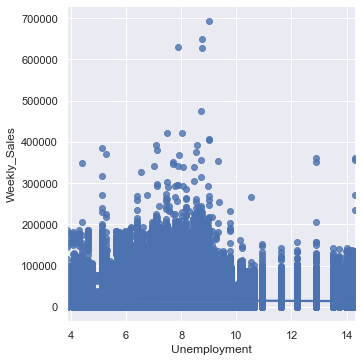

In [76]:
sns.lmplot(x='Unemployment',y='Weekly_Sales',data=clean_data1)

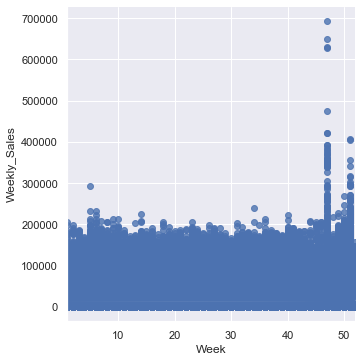

In [77]:
sns.lmplot(x='Week',y='Weekly_Sales',data=clean_data1)

## 3.4. Test for Correlation

<AxesSubplot:>

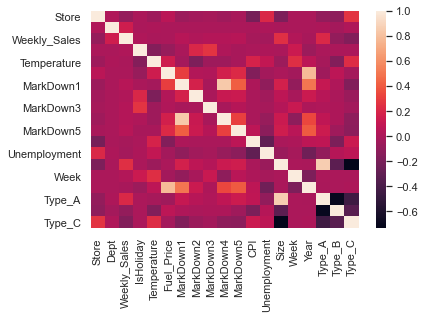

In [61]:
sns.heatmap(clean_data1.corr())  # Betrachtung der Korrelation über eine heatmap 

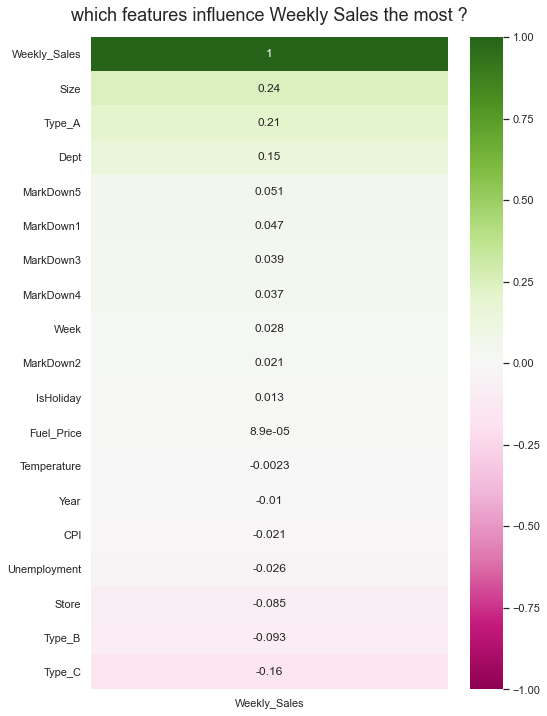

In [62]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(clean_data1.corr()[['Weekly_Sales']].sort_values(by='Weekly_Sales', ascending=False), vmin=-1, vmax=1, annot=True, cmap='PiYG')
heatmap.set_title('which features influence Weekly Sales the most ?', fontdict={'fontsize':18}, pad=16);

In [63]:
clean_data1['Holiday'] = clean_data1['Holiday'].fillna('')

In [64]:
clean_data1.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Holiday         0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Size            0
Week            0
Year            0
Type_A          0
Type_B          0
Type_C          0
dtype: int64

## 3.5. Create and analyse new data set

"small data set": test data for which we consider only 1 year for which we have MarkDown values.

In [65]:
# TEST: Create a small dataset that only looks at the times for which we have values for the MarkDowns.
# then we can run a test model with this data set
small_dataset1 = clean_data1[(clean_data1["Year"]==2011) & (clean_data1["Week"]>=45)]
small_dataset2 = clean_data1[(clean_data1["Year"]==2012) & (clean_data1["Week"]<=43)]
small_dataset = pd.concat([small_dataset1, small_dataset2])

small_dataset.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Holiday,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week,Year,Type_A,Type_B,Type_C
92,1,1,2011-11-11,18689.54,0,,59.11,3.297,10382.90,6115.67,...,2406.62,6551.42,217.998085,7.866,151315,45,2011,1,0,0
93,1,1,2011-11-18,19050.66,0,,62.25,3.308,6074.12,254.39,...,427.39,5988.57,218.220509,7.866,151315,46,2011,1,0,0
94,1,1,2011-11-25,20911.25,1,Thanksgiving,60.14,3.236,410.31,98.00,...,8.00,554.92,218.467621,7.866,151315,47,2011,1,0,0
95,1,1,2011-12-02,25293.49,0,,48.91,3.172,5629.51,68.00,...,2084.64,20475.32,218.714733,7.866,151315,48,2011,1,0,0
96,1,1,2011-12-09,33305.92,0,,43.93,3.158,4640.65,19.00,...,3639.42,14461.82,218.961846,7.866,151315,49,2011,1,0,0


In [66]:
small_dataset.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150929 entries, 92 to 421569
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         150929 non-null  int64         
 1   Dept          150929 non-null  int64         
 2   Date          150929 non-null  datetime64[ns]
 3   Weekly_Sales  150929 non-null  float64       
 4   IsHoliday     150929 non-null  int64         
 5   Holiday       150929 non-null  object        
 6   Temperature   150929 non-null  float64       
 7   Fuel_Price    150929 non-null  float64       
 8   MarkDown1     150929 non-null  float64       
 9   MarkDown2     150929 non-null  float64       
 10  MarkDown3     150929 non-null  float64       
 11  MarkDown4     150929 non-null  float64       
 12  MarkDown5     150929 non-null  float64       
 13  CPI           150929 non-null  float64       
 14  Unemployment  150929 non-null  float64       
 15  Size          15

In [67]:
small_dataset.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Holiday         0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Size            0
Week            0
Year            0
Type_A          0
Type_B          0
Type_C          0
dtype: int64

<AxesSubplot:>

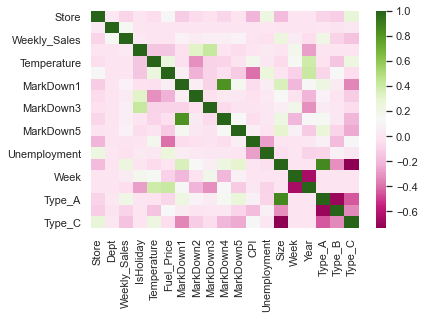

In [68]:
sns.heatmap(small_dataset.corr(),cmap="PiYG")  

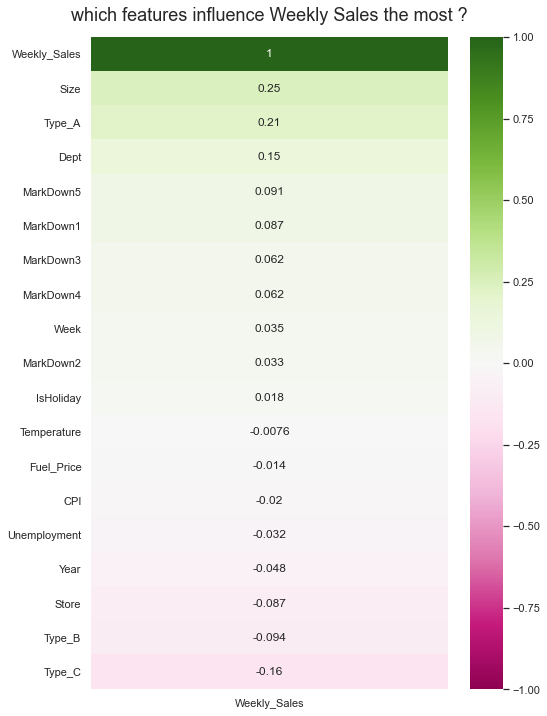

In [69]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(small_dataset.corr()[['Weekly_Sales']].sort_values(by='Weekly_Sales', ascending=False), vmin=-1, vmax=1, annot=True, cmap='PiYG')
heatmap.set_title('which features influence Weekly Sales the most ?', fontdict={'fontsize':18}, pad=16);

In [70]:
# We take out the following data:
# Fuel_Price has only a weak correlation to Weekly_Sales but a high correlation to Year 
# Unemployment, CPI and Temperature show hardly any correlation
# MarkDown1,2 and 5 and IsHoliday were taken out afterwards, since these have no influence in the model
clean_smalldata = small_dataset.drop(['Fuel_Price', 'Unemployment', 'CPI', 'Temperature', 'Holiday', 'MarkDown1', 'MarkDown2', 'MarkDown5', 'IsHoliday'], axis = 1) #

In [71]:
clean_smalldata.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150929 entries, 92 to 421569
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         150929 non-null  int64         
 1   Dept          150929 non-null  int64         
 2   Date          150929 non-null  datetime64[ns]
 3   Weekly_Sales  150929 non-null  float64       
 4   MarkDown3     150929 non-null  float64       
 5   MarkDown4     150929 non-null  float64       
 6   Size          150929 non-null  int64         
 7   Week          150929 non-null  int64         
 8   Year          150929 non-null  int64         
 9   Type_A        150929 non-null  uint8         
 10  Type_B        150929 non-null  uint8         
 11  Type_C        150929 non-null  uint8         
dtypes: datetime64[ns](1), float64(3), int64(5), uint8(3)
memory usage: 11.9 MB


## 3.6. normal (big) Data

In [72]:
# we take out the following data:
# MarkDown1-MarkDown5, since many data are missing, there is hardly any correlation. 
# Fuel_Price has only a weak correlation to Weekly_Sales but a high correlation to Year 
# Unemployment, CPI and Temperature show hardly correlation
# Holiday - interferes later in modeling
clean_data2 = clean_data1.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Fuel_Price', 'Unemployment', 'CPI', 'Temperature', 'Holiday'], axis = 1) #

In [73]:
clean_data2.isnull().sum() 

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Size            0
Week            0
Year            0
Type_A          0
Type_B          0
Type_C          0
dtype: int64

In [74]:
clean_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420212 entries, 0 to 421569
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420212 non-null  int64         
 1   Dept          420212 non-null  int64         
 2   Date          420212 non-null  datetime64[ns]
 3   Weekly_Sales  420212 non-null  float64       
 4   IsHoliday     420212 non-null  int64         
 5   Size          420212 non-null  int64         
 6   Week          420212 non-null  int64         
 7   Year          420212 non-null  int64         
 8   Type_A        420212 non-null  uint8         
 9   Type_B        420212 non-null  uint8         
 10  Type_C        420212 non-null  uint8         
dtypes: datetime64[ns](1), float64(1), int64(6), uint8(3)
memory usage: 50.1 MB


<AxesSubplot:>

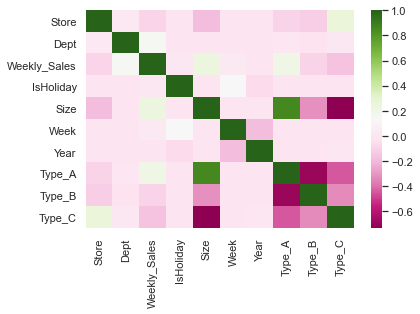

In [75]:
sns.heatmap(clean_data2.corr(),cmap="PiYG") 

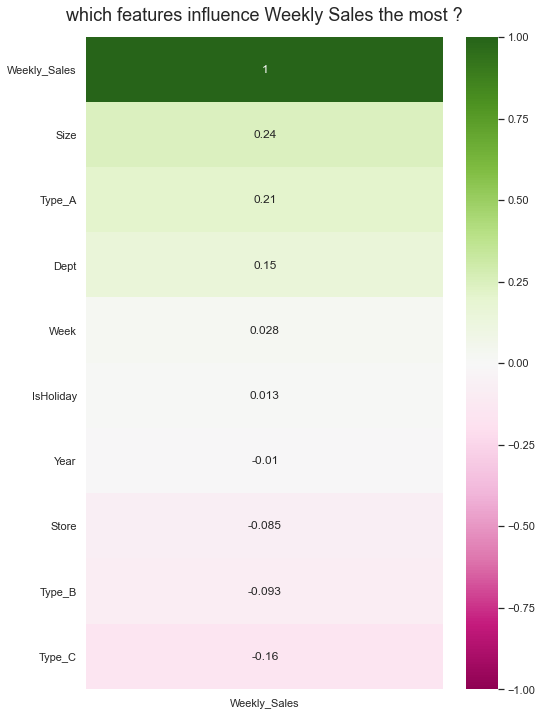

In [76]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(clean_data2.corr()[['Weekly_Sales']].sort_values(by='Weekly_Sales', ascending=False), vmin=-1, vmax=1, annot=True, cmap='PiYG')
heatmap.set_title('which features influence Weekly Sales the most ?', fontdict={'fontsize':18}, pad=16);

In [77]:
#sns.pairplot(clean_data2, vars=['Weekly_Sales', 'Dept', 'Size', 'Type_A'])

In [78]:
# save data local
clean_data2.to_csv('clean_data2.csv', index = False) 

## 3.7. Test and Training Data

In [79]:
# Split Data
inputs = clean_data2.drop(['Weekly_Sales', 'Date'], axis=1)
targets = clean_data2['Weekly_Sales']  # das ist die Zielvariable

In [80]:
#Feature Scaling (transforms our data into standard distributed data) 
# the data is transformed in such a way that then a mean of 0 and a standard deviation of 1 is obtained
# ~ (𝜇, 𝜎2) ~ (0,1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

In [81]:
# Split data into test and training - test data is 20%.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)


# 4. Modelling and Evaluation

## 4.1. Random Forest with normal (big) Data

class sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0. 0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

bootstrap: Whether bootstrap samples are used when creating trees. If False, the entire dataset is used to create each tree. Default is True.

max_depth: The default values for the parameters that control the size of trees (e.g. max_depth, min_samples_leaf, etc.) result in fully grown and untrimmed trees that can potentially be very large for some datasets. To reduce memory consumption, the complexity and size of the trees should be controlled by setting these parameter values. Default is None and means then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. The value of 70 has been proven by testing.

max_features: The default value max_features="auto" uses n_features at each split. Default is "auto".

min_samples_leaf: The minimum number of samples required to be at a leaf node. A split point at any depth is only considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This can have the effect of smoothing the model, especially in regression. Default is 1. Test series have shown that the value 4 gives the best results.

min_samples_split: The minimum number of samples required to split an internal node. Default is 2, through test series the value 10 has proven to be the most useful here. 

n_estimators: This is the number of trees you want to build before taking the maximum vote or average of predictions. A higher number of trees will result in better performance, but will make the code slower. Default is 100. Test series have shown: below and above 400 the accuracy decreases.

n_jobs: how many jobs can run in parallel influences the speed of the algorithm

The features are always permuted randomly at each split. Therefore, even with the same training data, max_features=n_features and bootstrap=False, the best split found may vary if the criterion improvement is identical for several splits enumerated in the search for the best split. To obtain deterministic behavior in the fitting, random_state must be specified in the test series.

In [82]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(bootstrap = True, max_depth = 70, max_features = 'auto', min_samples_leaf = 4, min_samples_split = 10, n_estimators = 10)

# rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)  # 0.955111
rfr.fit(x_train,y_train)
y_predictions=rfr.predict(x_test)

In [83]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_predictions)

1506.3206109502669

In [84]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_predictions)

19103020.45675435

In [85]:
accuracy = rfr.score(x_test, y_test)
print(accuracy)

0.9645552402964631


In [86]:
feature_list = list(inputs.columns) 

importances = list(rfr.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True) 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Dept                 Importance: 0.64
Variable: Size                 Importance: 0.2
Variable: Store                Importance: 0.08
Variable: Week                 Importance: 0.05
Variable: Year                 Importance: 0.01
Variable: IsHoliday            Importance: 0.0
Variable: Type_A               Importance: 0.0
Variable: Type_B               Importance: 0.0
Variable: Type_C               Importance: 0.0


## 4.2. Random Forest with new small Data

In [88]:
inputs_small = clean_smalldata.drop(['Weekly_Sales', 'Date'], axis=1)
targets_small = clean_smalldata['Weekly_Sales']  # das ist die Zielvariable
 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs_small)
inputs_scaleds = scaler.transform(inputs_small)

from sklearn.model_selection import train_test_split
x_trains, x_tests, y_trains, y_tests = train_test_split(inputs_scaleds, targets_small, test_size=0.2, random_state=365)


In [90]:
#rfr_small = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5) 
rfr_small = RandomForestRegressor(bootstrap = True, max_depth = 70, max_features = 'auto', min_samples_leaf = 4, min_samples_split = 10, n_estimators = 10)

rfr_small.fit(x_trains,y_trains)
y_predictions_small=rfr_small.predict(x_tests)

### MAE - der Mean Absolute Error
indicates the average absolute deviation of the forecast value from the actual value.  
value that actually occurred.  Overestimates and underestimates are accumulated in an undirected manner, so that MAE=0  
can be interpreted as a perfect forecast, i.e. the forecast value for each period t corresponds exactly to the actual value. 
the value that actually occurred. 

In [91]:
mean_absolute_error(y_tests, y_predictions_small)

1766.4411977247057

We obtain a MAE of 1,716.1138, means that the average deviation is about 1,716 dollars with which our forecast differs from the actual values.

### MSE - Mean  Squared  Error  
is the quadratic form of the ME.  As a result, large deviations from the actual value are given a disproportionately high weighting compared with smaller deviations, which are often negligible in practice. In addition, the individual forecast errors are now cumulated in the same way as for the MAE, so that the perfect forecast is again available at MSE=0.  

In [92]:
mean_squared_error(y_tests, y_predictions_small)

17008422.72019644

#R² - coefficient of determination
The so-called coefficient of determination (R²) expresses how well the regression line reflects the relationship between the independent and dependent variable. R² lies between 0 and 1, whereby the value R² = 1 would mean that every observed data point lies directly on the regression line.

In [93]:
accuracy_small = rfr_small.score(x_tests, y_tests) 
print(accuracy_small)

0.9684712372223249


This means that the predicted values deviate relatively little and are about 97% on the straight line.

In [94]:
# R² = 0.964437 with Markdown 1,2 and 5 included - were thus subsequently removed and R² increases
# R² = 0.9645159264218026 (n_estimators = 400,max_depth=15,n_jobs=5) 
# R² = 0.9692695835667837 with new parameters
# R² = 0.9698712189554696 with new parameters and removal of variables with importance 0 each variable since random

In [95]:
#The importance indicates how much the inclusion of a particular variable improves the prediction. 
feature_list = list(inputs_small.columns) # in einen numpy array umwandeln

importances = list(rfr_small.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True) # sortieren
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Dept                 Importance: 0.63
Variable: Size                 Importance: 0.14
Variable: Store                Importance: 0.08
Variable: Type_A               Importance: 0.06
Variable: MarkDown3            Importance: 0.04
Variable: Week                 Importance: 0.02
Variable: MarkDown4            Importance: 0.01
Variable: Year                 Importance: 0.0
Variable: Type_B               Importance: 0.0
Variable: Type_C               Importance: 0.0


In [97]:
predict_data = pd.DataFrame({'Weekly_Sales_predicted': y_predictions_small})
y_test_data = pd.DataFrame(y_tests[0:30186])  
predict_data.head(5)  

,Weekly_Sales_predicted
0,264.884683
1,7753.860622
2,26689.840592
3,7708.035305
4,6410.364661


In [98]:
y_test_data.head(5)

,Weekly_Sales
314427,239.81
100596,7081.39
284309,21586.81
149014,9063.87
368304,5411.37


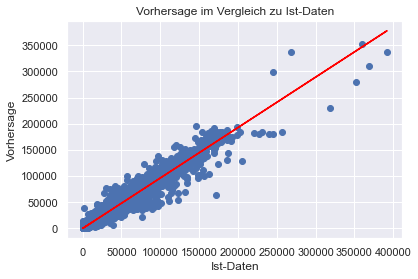

In [99]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(y_test_data, predict_data)
w = lr.coef_[0]

plt.scatter(y_test_data, predict_data)
plt.plot(y_test_data, w*y_test_data, c='red')
plt.title("Vorhersage im Vergleich zu Ist-Daten")
plt.xlabel("Ist-Daten")
plt.ylabel("Vorhersage")
plt.show()